<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bisection method.

In [1]:
def bisection(f,a_0,b_0,tol_x=0,tol_f=10**(-6)):
  # Input: f, [a,b], 
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  x_m=a_0+(b_0-a_0)/2
  while (abs(f(x_m))>tol_f) & (abs(b_0-a_0)>tol_x):
    if (f(x_m)*f(a_0)<0):
      b_0=x_m
    else:
      a_0=x_m
    x_m=a_0+(b_0-a_0)/2
  return (x_m)

Example: sin(x) on [0.025, pi)

In [30]:
import math
print('root approximation: ',bisection(math.cos,0.025,math.pi-.0001))

root approximation:  1.5707961202997183


Newton method.

In [27]:
def Newton(f, fprime, x_0,tol_x=0,tol_f=10**(-6),iter_max=100):
  #Input: f, f', x_0,
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  if(fprime(x_0)==0):
    return('considere otro valor inicial')
  else: x_1=x_0+f(x_0)/fprime(x_0)
  iter=1
  while (abs(f(x_1))>tol_f) & (abs(x_0-x_1)>tol_x) & (iter<iter_max):
    if(fprime(x_1)==0) | (iter>=iter_max): 
      return('err')
    else:
      x_0=x_1
      x_1=x_0-f(x_0)/fprime(x_0)
      iter+=1
  return x_1

Example: sin(x), initial condition 3.1

In [31]:
print('root approximation: ',Newton(math.sin,math.cos,3.1,tol_x=0.00001,tol_f=0.000001))

root approximation:  3.141592653587413


Secant method

In [4]:
def secant(f,x_0,x_1,tol_x=0,tol_f=10**(-6)):
  #Input: f, 
  #         x_0, x_1: Aproximaciones iniciales.
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  while (abs(f(x_1))>tol_f) & (abs(x_0-x_1)>tol_x):
    x_aux=x_1
    x_1=(x_0*f(x_1)-x_1*f(x_0))/(f(x_1)-f(x_0))
    x_0=x_aux
  return x_1

Example: sin(x) on [-pi/2,pi/3].

In [33]:
print('root approximation: ',secant(math.sin,-math.pi/2,math.pi/3))

root approximation:  1.521313143515061e-08


Exercise 2

In [5]:
def ejemplo1(x):
  return(math.exp(x)+2**(-x)+2*math.cos(x)-6)
def deriv_ejemplo1(x):
  return(math.exp(x)-math.log(2)*(2**(-x))-2*math.sin(x))
def ejemplo2(x):
  return(math.log(x-1)+math.cos(x-1))
def deriv_ejemplo2(x):
  return(1/(x-1)-math.sin(x-1))

Function 1: f(x)=e^x+2^{-x}+2cos(x)-6.

In [34]:
x_b=bisection(ejemplo1,1,2)
x_N=Newton(ejemplo1,deriv_ejemplo1,1.5)
x_s=secant(ejemplo1,1,2)
print('Bisection: ', x_b,'\n','Newton: ', x_N,'\n','Secant: ', x_s,)
print('Function value-Bisection: ', ejemplo1(x_b),'\n','Function value-Newton: ', ejemplo1(x_N),'\n','Function value-Secant: ', ejemplo1(x_s),)

Bisection:  1.829383373260498 
 Newton:  1.8293836019359082 
 Secant:  1.8293834739842125
Function value-Bisection:  -9.37903522846284e-07 
 Function value-Newton:  8.446576771348191e-12 
 Function value-Secant:  -5.24785351174728e-07


Function 2: f(x)=log(x-1)+cos(x-1).

In [42]:
x_b=bisection(ejemplo2,1.3,2)
#x_N=Newton(ejemplo2,deriv_ejemplo2,1.65)
x_s=secant(ejemplo2,1.3,2)
print('Bisection: ', x_b,'\n','Secant: ', x_s,)
print('Function value-Bisection: ', ejemplo2(x_b),'\n','Function value-Secant: ', ejemplo2(x_s),)

Bisection:  1.3977485656738282 
 Secant:  1.3977485079374574
Function value-Bisection:  1.908067338574071e-07 
 Function value-Secant:  6.801257712574227e-08


Note about Newton method at function 2.

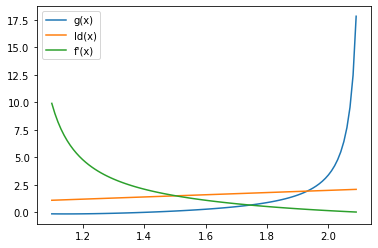

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1.1,2.1,0.01)
v_ejemplo2=np.vectorize(ejemplo2)
v_deriv_ejemplo2=np.vectorize(deriv_ejemplo2)
plt.plot(x,v_ejemplo2(x)/v_deriv_ejemplo2(x),x,x)
plt.plot(x,v_deriv_ejemplo2(x))
plt.legend(['g(x)',"Id(x)","f'(x)"])

Asume somehow we deduced there is a root x^* in a given interval, then consider 2 cases:
case 1: x_0<x^*, there, g(x)<0 therefor x_1>x_0. That way, we can define a crescent succession as long as x_k<x_*. 
case 2: x_0>x^*, similarly, g(x)>0 then we can define a decrescent succession as long as x_k>x^*.
In every step of Newton Method, we are in exactly one of the cases (or we are exactly at x_k=x^* which is what we want). So, the method will appoximate to the root as long as (1): there is not a cycle, i.e. exists x_N and T\in \mathbb{N}such that x_{N+T}=x_N\neq x^x. Or (2): x_k eventually left the given interval.



In [ ]:
def ejemplo3(x):
  return (230*x**4 + 18*x**3 +9*x**2-221*x-9)
def deriv_ejemplo3(x):
  return(920*x**3+54*x**2+18*x-221)

In [ ]:
#Entre -1 y 0
x_b=bisection(ejemplo3,-1,0)
x_N=Newton(ejemplo3,deriv_ejemplo3,-0.5)
x_s=secant(ejemplo3,-1,0)
print('Bisection: ', x_b,'\n','Newton: ', x_N,'\n','Secant: ', x_s,)
print('Function value-Bisection: ', ejemplo3(x_b),'\n','Function value-Newton: ', ejemplo3(x_N),'\n','Function value-Secant: ', ejemplo3(x_s),)

Bisection:  -0.040659286081790924 
 Newton:  -0.04065928831575888 
 Secant:  -0.040659288315725135
Function value-Bisection:  -4.952806005320554e-07 
 Function value-Newton:  5.329070518200751e-15 
 Function value-Secant:  -7.478462293875054e-12


In [ ]:
#Entre 0 y 1
x_b=bisection(ejemplo3,0,1)
x_N=Newton(ejemplo3,deriv_ejemplo3,0.5)
x_s=secant(ejemplo3,0,1)
print('Bisection: ', x_b,'\n','Newton: ', x_N,'\n','Secant: ', x_s,)
print('Function value-Bisection: ', ejemplo3(x_b),'\n','Function value-Newton: ', ejemplo3(x_N),'\n','Function value-Secant: ', ejemplo3(x_s),)

Bisection:  0.9623984172940254 
 Newton:  0.9623984187970517 
 Secant:  -0.04065928831557161
Function value-Bisection:  -9.706391495001299e-07 
 Function value-Newton:  3.0994954158813925e-08 
 Function value-Secant:  -4.1515235693623254e-11
